In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
%matplotlib inline

In [51]:
df = pd.read_csv('/prediction-job/carrefour_data.csv')  
df.head()

,id,date,time,items,day,month,year,weekDay
0,0,2016-01-14,0,1,14,1,2016,3
1,1,2016-01-15,0,2,15,1,2016,4
2,2,2016-01-16,0,4,16,1,2016,5
3,3,2016-01-17,0,9,17,1,2016,6
4,4,2016-01-18,0,1,18,1,2016,0


In [52]:
df.describe()

,id,time,items,day,month,year,weekDay
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.0,1656.000000
mean,827.500000,14.166667,106.118961,15.663043,2.445652,2016.0,3.000000
std,478.190339,5.873079,62.207234,8.733240,0.971220,0.0,1.989702
min,0.000000,0.000000,0.000000,1.000000,1.000000,2016.0,0.000000
25%,413.750000,10.000000,53.000000,8.000000,2.000000,2016.0,1.000000
50%,827.500000,14.500000,120.000000,15.500000,2.000000,2016.0,3.000000
75%,1241.250000,19.000000,150.000000,23.000000,3.000000,2016.0,5.000000
max,1655.000000,23.000000,266.000000,31.000000,4.000000,2016.0,6.000000


In [53]:
df[["month","items"]].groupby("month").sum()

,items
month,
1,35300
2,54865
3,58285
4,27283


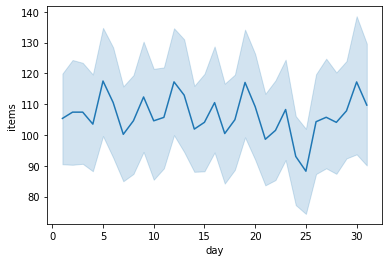

In [54]:
ax = sns.lineplot(x="day", y="items", data=df)

In [55]:
X = df[["time","day","month","weekDay"]] 
y = df[["items"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
decision_tree = DecisionTreeRegressor()

decision_tree = decision_tree.fit(X_train,y_train)
decision_tree.predict(X_test)

array([120., 137.,   5.,   3.,  92., 204., 203.,   5.,   6., 140., 121.,
       192., 104., 148.,   1.,  35., 146.,  10., 137., 149., 149.,   3.,
        24.,  24., 143.,  71.,  27., 140., 147., 211., 117.,   2., 185.,
       189.,  43.,  14.,   2., 139.,  98.,  76., 127.,  76.,  40.,  23.,
       132., 202., 177.,  17.,  10., 175.,  13., 138., 105., 126., 151.,
       162., 155., 158., 128., 117.,  28., 153.,  68., 134.,  89., 126.,
       138.,  94.,  61.,  20.,   1.,  66.,  84., 220., 148., 180.,   9.,
        71., 143., 151.,  63.,  33.,   2.,  14.,  27., 196., 119., 145.,
       124.,  32., 148.,  13., 113., 163., 131.,  66.,   8., 111.,   8.,
        87.,  91., 119., 151.,  85.,   5.,  50., 144.,  76., 127.,  33.,
       105., 114., 144.,  66., 115., 160., 119.,  47., 146.,   2.,   0.,
        61.,  79.,  61., 168., 162.,   0., 126.,  28., 157.,  63., 114.,
       204., 164., 132., 139.,  76., 200., 105.,  33., 158., 182., 127.,
       131.,   4., 164., 189., 184., 155.,  16.,   

In [56]:
decision_tree.score(X_test, y_test)

0.929509616044688